<a href="https://colab.research.google.com/github/maya-25/Financial-Portfolio/blob/main/Finance_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finance Portfolio "FAANG"

In [ ]:
#description: user portfolio optimisation using efficient frontier  

In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#FAANG
assets=['FB','AMZN','AAPL','NFLX','GOOG']

In [ ]:
#weights to the stocks
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [ ]:
#get the start date
stocksStartDate='2013-01-01'

In [ ]:
#ending_date
today=datetime.today().strftime('%Y-%m-%d')
today

'2020-12-21'

In [ ]:
#create a dataframe to store the adjusted close price of stocks

df=pd.DataFrame()
for stock in assets:
  df[stock]=web.DataReader(stock,data_source='yahoo',start=stocksStartDate,end=today)['Adj Close']

In [ ]:
#show the data frame
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.065252,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.849854,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.380503,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.284145,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.327978,13.880000,365.280823
...,...,...,...,...,...
2020-12-14,274.190002,3156.969971,121.779999,522.419983,1760.060059
2020-12-15,275.549988,3165.120117,127.879997,519.780029,1767.770020
2020-12-16,275.670013,3240.959961,127.809998,524.830017,1763.000000


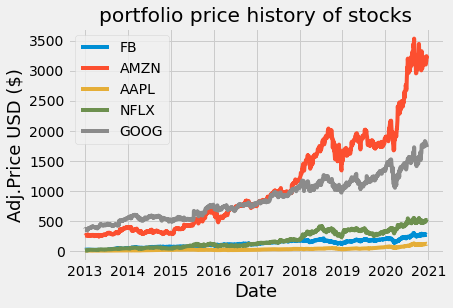

In [ ]:
#visually show the stock portfolio
title='portfolio price history of stocks'
#get the stocks
my_stocks=df
#plot the graph

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj.Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [ ]:
#show the daily simpel returns returns=(new_price/old_price)-1
returns=df.pct_change()
returns


,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-12-14,0.002340,0.013012,-0.005147,0.038154,-0.012184
2020-12-15,0.004960,0.002582,0.050090,-0.005053,0.004381
2020-12-16,0.000436,0.023961,-0.000547,0.009716,-0.002698


In [ ]:
#create and show the annualised covariance matrix
#This is from 365.25 (days on average per year) * 5/7 (proportion work days per week) - 6 (weekday holidays) - 3*5/7 (fixed date holidays) = 252.75 ≈ 253
cov_matrix_annual=returns.cov()*253
cov_matrix_annual


,FB,AMZN,AAPL,NFLX,GOOG
FB,0.119411,0.055367,0.045065,0.057002,0.050667
AMZN,0.055367,0.094691,0.040002,0.063761,0.048057
AAPL,0.045065,0.040002,0.082083,0.035312,0.038781
NFLX,0.057002,0.063761,0.035312,0.212205,0.048914
GOOG,0.050667,0.048057,0.038781,0.048914,0.066373


In [ ]:
#calculate the prtfolio variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.06162475535243334

In [ ]:
#calculate the volatility cluster aka standard deviation
portfolio_volatility=np.sqrt(port_variance)
portfolio_volatility

0.2482433389890519

In [ ]:
#calcualte the annual portfolio returns 
portfoliosimpleannualreturn=np.sum(returns.mean()*weights)*252
portfoliosimpleannualreturn

0.3602448477506789

In [ ]:
#show the volatility (risk)and variance
percent_var=str(round(port_variance,2)*100)+'%'
percent_vols=str(round(portfolio_volatility,2)*100)+'%'
percent_ret=str(round(portfoliosimpleannualreturn,2)*100)+'%'

print('expected annual return:'+percent_ret)
print('Annual volatility /risk:'+percent_vols)
print('Annual variance:'+ percent_var)

expected annual return:36.0%
Annual volatility /risk:25.0%
Annual variance:6.0%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 6.0MB/s 


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
#portfolio optimisation
#calculate the expected returns and the annualised sample covariance matrix of asset returns
mu=expected_returns.mean_historical_return(df)#mean
Sample=risk_models.sample_cov(df)#sample covariance 
#optimise  max sharpe ratio..it mesaures the performance of investment compared to investment which is risk free

ef=EfficientFrontier(mu,Sample)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.08593), ('AMZN', 0.30162), ('AAPL', 0.26423), ('NFLX', 0.34822), ('GOOG', 0.0)])
Expected annual return: 42.3%
Annual volatility: 27.4%
Sharpe Ratio: 1.47


(0.42309515631527217, 0.27432737366950644, 1.4693945810923617)

In [ ]:
0.08593+0.30162+0.26423+0.34822+0.0

1.0

In [ ]:
#get the discrete allocation of each share per stock

from pypfopt import DiscreteAllocation,get_latest_prices
latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value=15000)
allocation,leftover=da.lp_portfolio()
print('Discrete allocation:',allocation)
print('funds reamining: ${:.2f}'.format(leftover))


Discrete allocation: {'FB': 5, 'AMZN': 1, 'AAPL': 32, 'NFLX': 10}
funds reamining: $1018.73


In [ ]:
#description:thi sprogram scrapes stocks symbols and their company names from a website

In [ ]:
#import the packages
import requests
import pandas as pd
from bs4 import BeautifulSoup 

In [ ]:
#create the empty lists 
company_name=[]
company_symbol=[]

In [ ]:
URL='https://www.advfn.com/nyse/newyorkstockexchange.asp?companies=A'
page=requests.get(URL)
soup=BeautifulSoup(page.text,'html.parser')
rows_odd=soup.find_all('tr',attrs={'class':'ts0'})
rows_even=soup.find_all('tr',attrs={'class':'ts1'})

In [ ]:
rows_odd

[<tr class="ts0"><td align="left"><a href="https://ih.advfn.com/stock-market/NYSE/a-h-belo-AHC/stock-price">A H Belo Corporation</a></td><td><a href="https://ih.advfn.com/stock-market/NYSE/a-h-belo-AHC/stock-price">AHC</a></td><td><a href="https://ih.advfn.com/stock-market/NYSE/a-h-belo-AHC/chart"><img src="/s/stock-chart.gif"/></a><a href="https://ih.advfn.com/stock-market/NYSE/a-h-belo-AHC/news"><img src="/s/stock-news.gif"/></a><a href="https://ih.advfn.com/stock-market/NYSE/a-h-belo-AHC/financials"><img src="/s/fundamentals.gif"/></a><a href="https://ih.advfn.com/stock-market/NYSE/a-h-belo-AHC/trades"><img src="/s/stock-trades.gif"/></a></td></tr>,
 <tr class="ts0"><td align="left"><a href="https://ih.advfn.com/stock-market/NYSE/aac-AAC/stock-price">AAC Holdings Inc</a></td><td><a href="https://ih.advfn.com/stock-market/NYSE/aac-AAC/stock-price">AAC</a></td><td><a href="https://ih.advfn.com/stock-market/NYSE/aac-AAC/chart"><img src="/s/stock-chart.gif"/></a><a href="https://ih.advf

In [ ]:
for i in rows_odd:
  row=i.find_all('td')
  company_name.append(row[0].text.strip()) #company name
  company_symbol.append(row[1].text.strip()) #company symbol


  for i in rows_even:
  row=i.find_all('td')
  company_name.append(row[0].text.strip()) #company name
  company_symbol.append(row[1].text.strip()) #company symbol

In [ ]:
company_name,company_symbol

(['A H Belo Corporation',
  'AAC Holdings Inc',
  'ABB Ltd',
  'ADC Therapeutics SA',
  'AEABridges Impact Corp',
  'AECOM',
  'AES Corp',
  'AG Mortgage Investment Trust Inc',
  'AK Steel Holding Corp',
  'AMN Healthcare Services Inc',
  'AO Smith Corp',
  'ARC Document Solutions Inc',
  'ASA Gold and Precious Metals Limited',
  'AT&T Inc',
  'AT&T Inc',
  'AVX Corp',
  'AZZ Inc',
  'AbbVie Inc',
  'Abercrombie and Fitch Co',
  'Aberdeen Global Premier Properties Fund',
  'Aberdeen Japan Equity Fund Inc',
  'Aberdeen Total Dynamic Dividend Fund',
  'Accel Entertainment Inc',
  'Acco Brands Corporation',
  'Acuity Brands Inc',
  'Adams Diversified Equity Fund Inc',
  'Adecoagro SA',
  'Adit EdTech Acquisition Corp',
  'AdvanSix Inc',
  'Advanced Disposal Services Inc',
  'Advent Convertible and Income Fund',
  'Aercap Holdings NV',
  'Aerojet Rocketdyne Holdings Inc',
  'Affiliated Managers Group Inc',
  'Agilent Technologies',
  'Agree Realty Corp',
  'Air Products and Chemicals Inc',

In [ ]:
#define a function to dynamically select the letter appending at the end of the URL
def namestartingwithletter(Letter):
  Letter=Letter.upper()
  URL='https://www.advfn.com/nyse/newyorkstockexchange.asp?companies='+Letter
  page=requests.get(URL)
  soup=BeautifulSoup(page.text,'html.parser')
  rows_odd=soup.find_all('tr',attrs={'class':'ts0'})
  rows_even=soup.find_all('tr',attrs={'class':'ts1'})

  for i in rows_odd:
    row=i.find_all('td')
    company_name.append(row[0].text.strip()) #company name
    company_symbol.append(row[1].text.strip()) #company symbol


  for i in rows_even:

    row=i.find_all('td')
    company_name.append(row[0].text.strip()) #company name
    company_symbol.append(row[1].text.strip()) #company symbol
  return (company_name,company_symbol)




In [ ]:
temp_name,temp_symbol=namestartingwithletter('h')
temp_name

['A H Belo Corporation',
 'AAC Holdings Inc',
 'ABB Ltd',
 'ADC Therapeutics SA',
 'AEABridges Impact Corp',
 'AECOM',
 'AES Corp',
 'AG Mortgage Investment Trust Inc',
 'AK Steel Holding Corp',
 'AMN Healthcare Services Inc',
 'AO Smith Corp',
 'ARC Document Solutions Inc',
 'ASA Gold and Precious Metals Limited',
 'AT&T Inc',
 'AT&T Inc',
 'AVX Corp',
 'AZZ Inc',
 'AbbVie Inc',
 'Abercrombie and Fitch Co',
 'Aberdeen Global Premier Properties Fund',
 'Aberdeen Japan Equity Fund Inc',
 'Aberdeen Total Dynamic Dividend Fund',
 'Accel Entertainment Inc',
 'Acco Brands Corporation',
 'Acuity Brands Inc',
 'Adams Diversified Equity Fund Inc',
 'Adecoagro SA',
 'Adit EdTech Acquisition Corp',
 'AdvanSix Inc',
 'Advanced Disposal Services Inc',
 'Advent Convertible and Income Fund',
 'Aercap Holdings NV',
 'Aerojet Rocketdyne Holdings Inc',
 'Affiliated Managers Group Inc',
 'Agilent Technologies',
 'Agree Realty Corp',
 'Air Products and Chemicals Inc',
 'Ajax I',
 'Alamo Group Inc',
 'Ala

In [ ]:
import string
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [ ]:
#getting all the comapny name and company symbols
for char in string.ascii_uppercase:
  (temp_name,temp_symbol)=namestartingwithletter(char)

In [ ]:
temp_symbol

['AHC',
 'AAC',
 'ABB',
 'ADCT',
 'IMPX.U',
 'ACM',
 'AES',
 'MITT',
 'AKS',
 'AMN',
 'AOS',
 'ARC',
 'ASA',
 'T',
 'TBB',
 'AVX',
 'AZZ',
 'ABBV',
 'ANF',
 'AWP',
 'JEQ',
 'AOD',
 'ACEL',
 'ACCO',
 'AYI',
 'ADX',
 'AGRO',
 'ADEX.U',
 'ASIX',
 'ADSW',
 'AVK',
 'AER',
 'AJRD',
 'MGR',
 'A',
 'ADC',
 'APD',
 'AJAX.U',
 'ALG',
 'ALK',
 'ALB',
 'AA',
 'ALEX',
 'ARE',
 'AQNA',
 'Y',
 'ALLE',
 'ALE',
 'AWF',
 'AFB',
 'CBH',
 'NCZ',
 'NFJ',
 'ALL',
 'PINE',
 'AYX',
 'ATAC',
 'AGCB',
 'ACH',
 'ALUS.U',
 'AMBC',
 'AMCR',
 'AMRC',
 'AHM',
 'AXL',
 'AEO',
 'AEL',
 'AFG',
 'AMH',
 'AMID',
 'ARA',
 'AMT',
 'AWK',
 'ATA.U',
 'AMP',
 'AME',
 'RYCE',
 'AP',
 'AMPY',
 'PLAN',
 'DYFN',
 'AXE',
 'AM',
 'ANTM',
 'AON',
 'AIRC',
 'APY',
 'APO',
 'AFT',
 'APSG.U',
 'APLE',
 'ATR',
 'WTR',
 'AQ',
 'ABR',
 'MTCN',
 'ADM',
 'ARNC',
 'ACA',
 'ARD',
 'ACRE',
 'ARES',
 'ARGD',
 'ANET',
 'AIW',
 'ARLO',
 'AFI',
 'ARW',
 'APAM',
 'ABG',
 'ACND',
 'ASH',
 'ASPL.U',
 'ASPI',
 'ASB',
 'AIZN',
 'AGO',
 'ATTO',
 'ATKR',

In [ ]:
#dataframe that contains the company names and company symbols
data=pd.DataFrame(columns=['company_name','company_symbol'])
data['company_name']=temp_name
data['company_symbol']=temp_symbol
#show data
data

,company_name,company_symbol
0,A H Belo Corporation,AHC
1,AAC Holdings Inc,AAC
2,ABB Ltd,ABB
3,ADC Therapeutics SA,ADCT
4,AEABridges Impact Corp,IMPX.U
...,...,...
3052,Zoetis Inc,ZTS
3053,Zymeworks Inc,ZYME
3054,Zendesk Inc,ZEN
3055,Zions Bancorporation NA,ZBK


In [ ]:
#removing null values
data=data[data['company_name']!='']
#show clean data
data

,company_name,company_symbol
0,A H Belo Corporation,AHC
1,AAC Holdings Inc,AAC
2,ABB Ltd,ABB
3,ADC Therapeutics SA,ADCT
4,AEABridges Impact Corp,IMPX.U
...,...,...
3052,Zoetis Inc,ZTS
3053,Zymeworks Inc,ZYME
3054,Zendesk Inc,ZEN
3055,Zions Bancorporation NA,ZBK


In [ ]:
from google.colab import files
data.to_csv('Stockportfolio.csv') 
files.download('Stockportfolio.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Description: This program optimises the portfolio

In [ ]:
#import the python libraries
import pandas as pd
import numpy as np
import requests

In [ ]:
#loading the data
from google.colab import files
files.upload()

KeyboardInterrupt: ignored